In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [27]:
df = pd.read_csv(r'data\Student Depression Dataset.csv')
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [28]:
df = df.dropna(axis=0)

In [29]:
target_var = ['Depression']

categorical_values = {
    'Sleep Duration': 0.8 / 4.9,
    'Dietary Habits': 0.4 / 4.9
}

numeric_values_inv = {
    'Study Satisfaction': 0.6 / 4.9,
    'Job Satisfaction': 0.7 / 4.9
}

numeric_values = {
    'Academic Pressure': 0.7 / 4.9,
    'Work Pressure': 0.6 / 4.9,
    'Work/Study Hours': 0.3 / 4.9,
    'Financial Stress': 0.8 / 4.9
}


numeric_values_max = df[numeric_values.keys()].max() * 1.2
numeric_values_inv_max = df[numeric_values_inv.keys()].max() * 1.2

sleep_duration_defuzz = {
    'Less than 5 hours': 0.9,
    '5-6 hours': 0.6,
    '7-8 hours': 0.1,
    'More than 8 hours': 0.4,
    'Others': 0.7
}

dietary_habits_defuzz = {
    'Healthy': 0.1,
    'Unhealthy': 0.85,
    'Moderate': 0.3,
    'Others': 0.5
}

categorical_values_defuzz = {
    'Sleep Duration': sleep_duration_defuzz,
    'Dietary Habits': dietary_habits_defuzz
}

# Все независимые переменные и соответствующие им веса
independent_vars = list(categorical_values.keys()) + list(numeric_values.keys()) + list(numeric_values_inv.keys())
independent_vars_weights = categorical_values | numeric_values | numeric_values_inv

In [30]:
df = df[
    independent_vars + target_var
    ]
df.loc[:, numeric_values.keys()] = df[numeric_values.keys()] / numeric_values_max
df.loc[:, numeric_values_inv.keys()] = 1 - df[numeric_values_inv.keys()] / numeric_values_inv_max

for col, mapping in categorical_values_defuzz.items():
    df.loc[:, col] = df[col].map(mapping)

df

,Sleep Duration,Dietary Habits,Academic Pressure,Work Pressure,Work/Study Hours,Financial Stress,Study Satisfaction,Job Satisfaction,Depression
0,0.6,0.1,0.833333,0.0,0.208333,0.166667,0.666667,1.0,1
1,0.6,0.3,0.333333,0.0,0.208333,0.333333,0.166667,1.0,0
2,0.9,0.1,0.500000,0.0,0.625000,0.166667,0.166667,1.0,0
3,0.1,0.3,0.500000,0.0,0.277778,0.833333,0.666667,1.0,1
4,0.6,0.3,0.666667,0.0,0.069444,0.166667,0.500000,1.0,0
...,...,...,...,...,...,...,...,...,...
27896,0.6,0.85,0.833333,0.0,0.486111,0.166667,0.166667,1.0,0
27897,0.9,0.1,0.333333,0.0,0.000000,0.500000,0.500000,1.0,0
27898,0.6,0.85,0.500000,0.0,0.833333,0.333333,0.333333,1.0,0
27899,0.9,0.1,0.833333,0.0,0.694444,0.833333,0.666667,1.0,1


In [31]:
target = 'Depression'
n_classes = 2
y = df[target].astype(int)

# 4. Признаки — всё кроме Depression
X = df.drop(columns=[target])

# 5. Кодируем категориальные признаки, если они есть в строковом виде
X = pd.get_dummies(X, drop_first=True)  # самый надёжный способ

# 6. Делим на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [32]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    Dropout(0.3),
    
    Dense(16, activation='relu'),
    
    Dense(1 if n_classes == 2 else n_classes, 
          activation='sigmoid' if n_classes == 2 else 'softmax')
])

C:\Users\Al\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [34]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=2
)

Epoch 1/100
558/558 - 1s - 2ms/step - accuracy: 0.7140 - loss: 0.5551 - val_accuracy: 0.7856 - val_loss: 0.4664
Epoch 2/100
558/558 - 0s - 860us/step - accuracy: 0.7750 - loss: 0.4924 - val_accuracy: 0.7845 - val_loss: 0.4663
Epoch 3/100
558/558 - 0s - 856us/step - accuracy: 0.7801 - loss: 0.4824 - val_accuracy: 0.7834 - val_loss: 0.4639
Epoch 4/100
558/558 - 0s - 852us/step - accuracy: 0.7793 - loss: 0.4782 - val_accuracy: 0.7845 - val_loss: 0.4626
Epoch 5/100
558/558 - 0s - 853us/step - accuracy: 0.7799 - loss: 0.4751 - val_accuracy: 0.7847 - val_loss: 0.4634
Epoch 6/100
558/558 - 0s - 849us/step - accuracy: 0.7840 - loss: 0.4722 - val_accuracy: 0.7849 - val_loss: 0.4608
Epoch 7/100
558/558 - 0s - 849us/step - accuracy: 0.7839 - loss: 0.4715 - val_accuracy: 0.7836 - val_loss: 0.4613
Epoch 8/100
558/558 - 0s - 858us/step - accuracy: 0.7853 - loss: 0.4700 - val_accuracy: 0.7861 - val_loss: 0.4634
Epoch 9/100
558/558 - 0s - 852us/step - accuracy: 0.7844 - loss: 0.4683 - val_accuracy: 0.

In [35]:
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)
auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC = {auc:.4f}")
print(classification_report(y_test, y_pred, 
                          target_names=le.classes_ if n_classes > 2 else None))

175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step
ROC-AUC = 0.8554
              precision    recall  f1-score   support

           0       0.77      0.69      0.72      2313
           1       0.79      0.85      0.82      3267

    accuracy                           0.78      5580
   macro avg       0.78      0.77      0.77      5580
weighted avg       0.78      0.78      0.78      5580



In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

def plot_roc_curves(y_true, y_pred_proba, model_names=None):
    """
    Строит ROC-кривые для одной или нескольких моделей.
    
    Параметры:
    y_true         — настоящие метки (1D массив)
    y_pred_proba   — предсказанные вероятности:
                     - для бинарной: список массивов формы (n_samples,)
                     для многоклассовой: список массивов формы (n_samples, n_classes)
    model_names    — названия моделей (по желанию)
    """
    
    # Автоопределение: бинарная или многоклассовая
    binary = True
    n_classes = 2
    
    plt.figure(figsize=(8, 7))
    
   
    for i, probs in enumerate(y_pred_proba):
        fpr, tpr, _ = roc_curve(y_true, probs)
        roc_auc = auc(fpr, tpr)
        name = model_names[i] if model_names else f"Модель {i+1}"
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')
    
   
    
    # Диагональ (случайная модель)
    # plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Случайная модель (AUC = 0.50)')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Специфичность)', fontsize=12)
    plt.ylabel('True Positive Rate (Чувствительность)', fontsize=12)
    plt.title('ROC-кривая', fontsize=14)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step


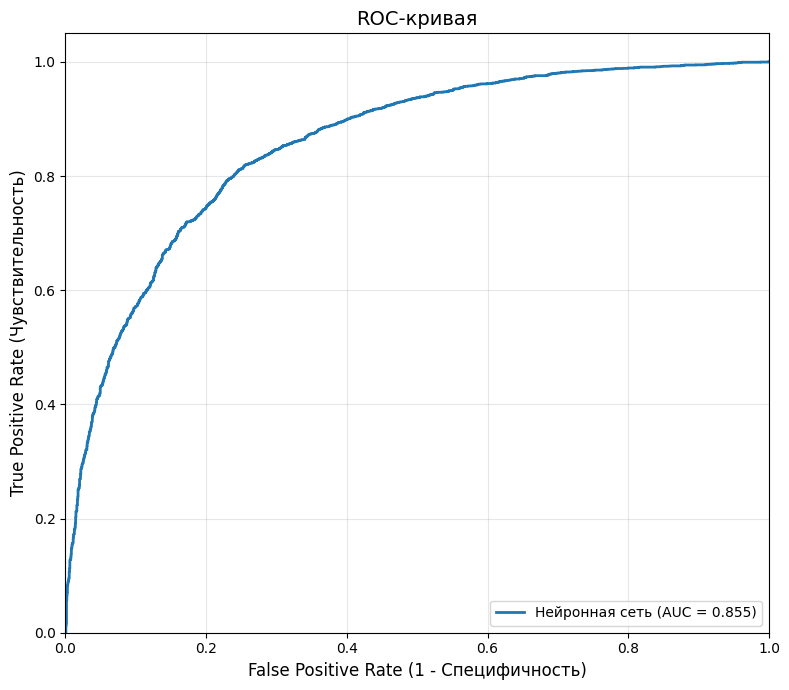

In [41]:
plot_roc_curves(
    y_true = y_test,
    y_pred_proba = [
        # logreg.predict_proba(X_test_scaled)[:, 1],           # sklearn модель
        model.predict(X_test).ravel()                 # Keras модель
    ],
    model_names = ['Нейронная сеть']
)